---
tags: ["cours", "terminale", "lycée", "numérique et sciences informatiques", "nsi"]
---

::: programme

+------------------------+-----------------------------------+---------------------------------------+
|        Contenus        |        Capacités attendues        |             Commentaires              |
+========================+===================================+=======================================+
| Algorithmes sur les    | Calculer la taille et la hauteur  | Une structure de données              |
| arbres binaires et sur | d’un arbre.                       | récursive adaptée est utilisée.       |
| les arbres binaires de |                                   |                                       |
| recherche.             | Parcourir un arbre de différentes | L’exemple des arbres permet           |
|                        | façons (ordres infixe, préfixe ou | d’illustrer la programmation par      |
|                        | suffixe ; ordre en largeur        | classe.                               |
|                        | d’abord).                         |                                       |
|                        |                                   | La recherche dans un arbre de         |
|                        | Rechercher une clé dans un        | recherche équilibré est de coût       |
|                        | arbre de recherche, insérer une   | logarithmique.                        |
|                        | clé.                              |                                       |
+------------------------+-----------------------------------+---------------------------------------+

:::

Dans ce chapitre nous allons voir quelques algorithmes classiques sur les
[arbres](/tg/nsi/1-structures-de-donnees/4-arbres/):

- Calcul de la taille et de la hauteur de l'arbre.
- Parcours de l'arbre de différentes façons
- Recherche et insertion d'une clé dans un arbre binaire de recherche.

## Description de la structure de données

Pour représenter les arbres, nous allons décrire l'arbre à partir d'une classe `Node` _récursive_
avec les attributs suivants:

- `value`: valeur ou clé du nœud de type numérique,
- `left`: sous-arbre gauche de type `Node`,
- `right`: sous-arbre droit de type `Node`,

Cette structure de données est _récursive_ car les attributes `left` et `right` de l'objet `Node`
sont eux-mêmes de type `Node`.

::: plus

La syntaxe utilisée est basée sur le package python
[binarytree](https://binarytree.readthedocs.io/en/latest/index.html) ce qui à l'inconvénient
d'être en anglais, mais qui nous permettra de programmer et tester facilement nos algorithmes en
Python.

:::

Arbre aléatoire


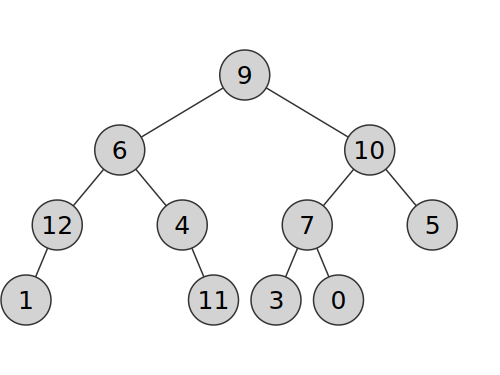

In [2]:
from binarytree import Node, tree
# On peut facilement créer un arbre aléatoire
mon_arbre = tree(height=3)

# L'affichage de l'arbre est aisé
print("Arbre aléatoire")
mon_arbre

A la main


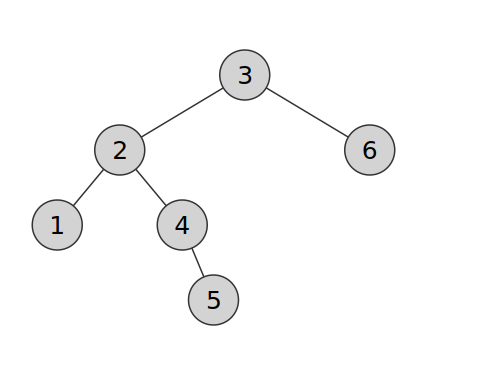

In [3]:
# ou créer l'arbre de toutes pièces
arbre = Node(3)
arbre.left = Node(2)
arbre.left.left = Node(1)
arbre.left.right = Node(4)
arbre.left.right.right = Node(5)
arbre.right = Node(6)
print("A la main")
arbre

## Calculer la hauteur de l'arbre

Pour rappel:

::: {.def terme="Hauteur d'un arbre"}

La hauteur d'un arbre est la plus grande profondeur d'une feuille de l'arbre.

:::

Pour rappel:

::: {.def terme="Taille d'un arbre"}

La taille d'un arbre est son nombre de nœuds.

:::

Nous allons à nouveau utiliser une fonction _recursive_.

A chaque appel, on renvoie `1 + max(taille(node.left), taille(node.right))`.

Mais comme toute fonction recursive, il faut un cas de base qui ne nécessite pas le rappel de la fonction(sans quoi on aurait une boucle infinie). Ce cas est l'absence de noeud, cela signifie que le noeud parent était une feuille, et renvoie -1 pour diminuer la hauteur accumulée de 1.

Voici le pseudo-code correspondant à cette fonction:

```
hauteur(Arbre A) :
    Si A vide
		retourner -1
    retourner 1 + max(hauteur(gauche(A)), hauteur(droite(A)))
```

Et voici l'implémentation de cette fonction en Python en utilisant la classe `binarytree.Node` pour représenter les arbres binaires.

hauteur: 3


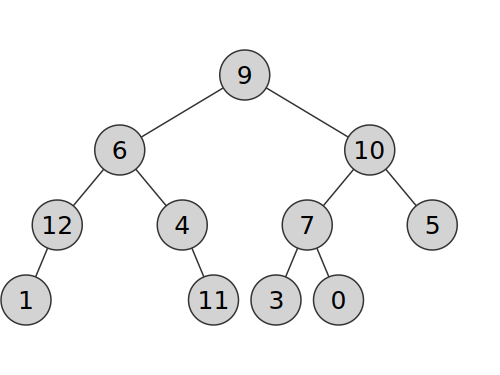

In [4]:
def hauteur(node):
    """Fonction récursive renvoyant la hauteur d'un arbre
    
    Arguments
    ---------
    node: Node
        Le noeud racine de l'arbre
    
    Returns
    -------
    int
        La hauteur de l'arbre
    """
    # Cas de base 
    if not(node):
        return -1
    else:
        # print(node)
        return 1 + max(hauteur(node.left), hauteur(node.right))
        
print("hauteur:", hauteur(mon_arbre))
mon_arbre

N'hésitez pas à décommenter le `print` pour observer les arbres sur lesquels sont appelés cette fonction.

::: appli

Schématiser la pile d'appels de la fonction récursive utilisée pour obtenir ce résultat.

:::

## Calculer la taille de l'arbre

Pour rappel:

::: {.def terme="Taille d'un arbre"}

La taille d'un arbre est son nombre de nœuds.

:::


Encore une fois, nous allons utiliser une fonction _recursive_.

A chaque appel, au lieu d'utiliser le maximum  comme précédemment on va simplement additionner les hauteurs des sous-arbres: on renvoie `1 + hauteur(node.left), hauteur(node.right))`.

Le cas de base, en cas d'absence de noeud, on renvoie 0.

Voici le pseudo-code correspondant à cette fonction:

```
taille(Arbre A) :
    Si A vide
		retourner 0
    retourner 1 + taille(gauche(A)) + taille(droite(A))
```

Et voici l'implémentation de cette fonction en Python en utilisant la classe `binarytree.Node` pour représenter les arbres binaires.

taille: 11


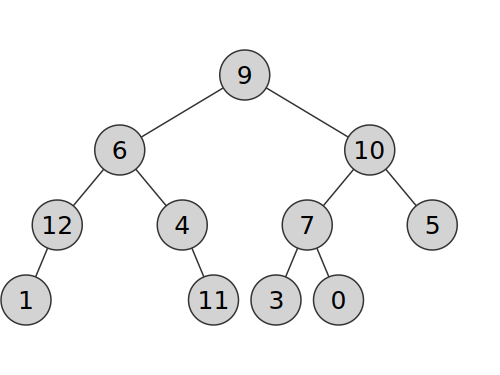

In [5]:
def taille(node):
    """Fonction récursive renvoyant la taille d'un arbre
    
    Arguments
    ---------
    node: Node
        Le noeud racine de l'arbre
    
    Returns
    -------
    int
        La taille de l'arbre
    """
    # Cas de base 
    if not(node):
        return 0
    else:
        # print(node)
        return 1 + taille(node.left) + taille(node.right)
  

print("taille:", taille(mon_arbre))
mon_arbre

## Parcours de l'arbre

Nous allons voir quatre méthodes de parcours des arbres, en fonction de l'ordre dans lequel on parcourt les noeuds:

- parcours préfixe
- parcours postfixe
- parcours infixe
- parcours en largeur

![Comparaisons des parcours d'arbres](../../images/parcours-arbres-wikipedia.png)

### Parcours préfixe

Dans cet ordre, chaque nœud est visité puis chacun de ses fils.

Voici le pseudo-code extrait de l'article Wikipedia sur les arbres.

```
visiterPréfixe(Arbre A) :
    visiter (A)
    Si nonVide (gauche(A))
          visiterPréfixe(gauche(A))
    Si nonVide (droite(A))
          visiterPréfixe(droite(A))
```

### Parcours postfixe

On affiche chaque nœud après avoir affiché chacun de ses fils.

Voici le pseudo-code extrait de l'article Wikipedia sur les arbres.

```
visiterPostfixe(Arbre A) :
    Si nonVide(gauche(A))
       visiterPostfixe(gauche(A))
    Si nonVide(droite(A))
       visiterPostfixe(droite(A))
    visiter(A)
```

### Parcours infixe

On visite chaque nœud entre les nœuds de son sous-arbre de gauche et les nœuds de son sous-arbre de droite. C'est une manière assez commune de parcourir un arbre binaire de recherche, car il donne les valeurs dans l'ordre croissant. 

Voici le pseudo-code extrait de l'article Wikipedia sur les arbres.

```
visiterInfixe(Arbre A) :
    Si nonVide(gauche(A))
       visiterInfixe(gauche(A))
    visiter(A)
    Si nonVide(droite(A))
       visiterInfixe(droite(A))
```


### Parcours en largeur

On parcours les noeuds de gauche à droite étage par étage, comme si on "lisait" l'arbre.

Voici le pseudo-code issu de l'article Wikipedia sur les arbres.

Ce code n'est pas _recusrif_ et a la particularité d'utiliser une structure de file avec les méthodes `enfiler` et `défiler`.

```
ParcoursLargeur(Arbre A) {
   f = FileVide
   enfiler(Racine(A), f)
   Tant que (f != FileVide) {
       nœud = defiler(f)
       Visiter(nœud)                        //On choisit de faire une opération
       Si (gauche(nœud) != null) Alors
           enfiler(gauche(nœud), f)
       Si (droite(nœud) != null) Alors
           enfiler(droite(nœud), f)
   }
}
```

Voici un exemple d'implémentation en Python utilisant une liste en guise de file avec les méthodes:

- `list.insert(0, el)`, pour enfiler l'élément à l'index 0. 
- `list.pop()`, pour supprimer et renvoyer le dernier élément de la file(le défiler). 

Parcours en largeur
11
13
5
3
2
14
10
9
4
8
12


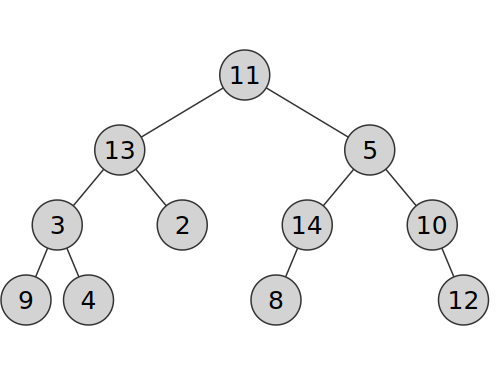

In [5]:
def parcours_largeur(arbre):
    f = []
    f.insert(0, arbre)
    while f:
        noeud = f.pop()
        print(noeud.value)
        if noeud.left:
            f.insert(0, noeud.left)
        if noeud.right:
            f.insert(0, noeud.right)

print("Parcours en largeur")
parcours_largeur(mon_arbre)
mon_arbre

## Arbre binaire de recherche

Comme nous l'avons vu dans le chapitre sur les [arbres](../../1-structures-de-donnees/4-arbres/#arbres-binaires-de-recherche) de la partie structure de données,

> un arbre binaire de recherche permet des opérations rapides pour rechercher une clé, insérer ou
supprimer une clé.


Pour rappel:

::: {.def titre="Arbre binaire de recherche"}

Il s'agit d'un arbre binaire dans lequel toutes les valeurs dans le sous-arbre gauche d'un nœud
sont inférieures à la valeur à la racine de l'arbre et toutes les valeurs dans le sous-arbre droit
d'un nœud sont supérieures ou égales à la valeur à la racine de l'arbre.

:::

Nous allons voir les algorithmes permettant la recherche et l'insertion d'une clé.

Encore une fois nous utiliserons le package `binarytree` qui permet de facilementcréer des arbres binaires  grâce à la fonction `bst`(_binary search tree_).

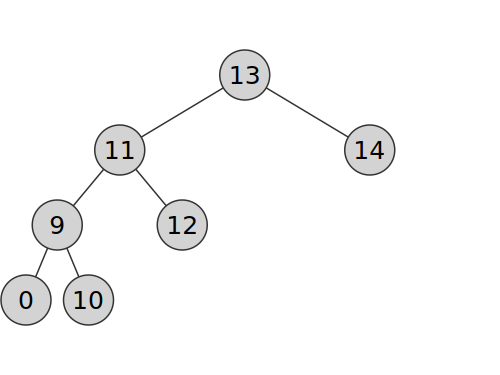

In [6]:
from binarytree import bst
abr = bst(height=3)
abr

### Insertion d'une clé

> L'insertion d'un nœud commence par une recherche : on cherche la clé du nœud à insérer ; lorsqu'on arrive à une feuille, on ajoute le nœud comme fils de la feuille en comparant sa clé à celle de la feuille : si elle est inférieure, le nouveau nœud sera à gauche ; sinon il sera à droite. 

```
fonction Insertion(A,e)
        Si A = .
            retourner (e,.,.)
        Sinon A = (x,FilsGauche,FilsDroit)
            Si e < x
                retourner (x,Insertion(FilsGauche,e),FilsDroit)
            Sinon
                retourner (x,FilsGauche,Insertion(FilsDroit,e))
```
*[ABR sur Wikipedia](https://fr.wikipedia.org/wiki/Arbre_binaire_de_recherche#Insertion)*{.cite-source}

On peut traduire cet algorithme en Python de cette façon:

Arbre initial


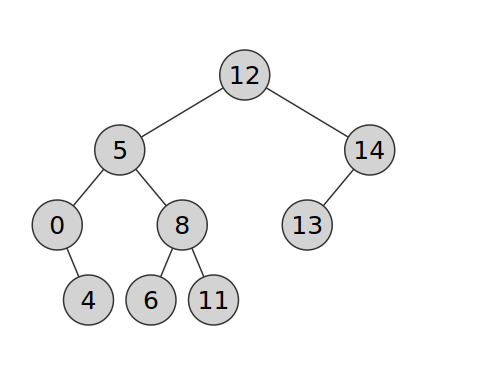

In [27]:
def insertion(node, e):
    """Insertion de l'élément e dans l'arbre node
    
    Arguments
    ---------
    node: binarytree.Node
        l'arbre dans lequel doit être inséré le noeud
    e: Number
        L'élément à insérer
    Returns
    -------
    binarytree.Node
        l'arbre modifié
    """
    if not(node):
        return Node(e)
    x = node.value
    if e < x:
        return Node(value=x,
                    left=insertion(node.left, e),
                    right=node.right)
    else:
        return Node(value=x,
                    left=node.left,
                    right=insertion(node.right, e))

print("Arbre initial")
abr = bst()
abr

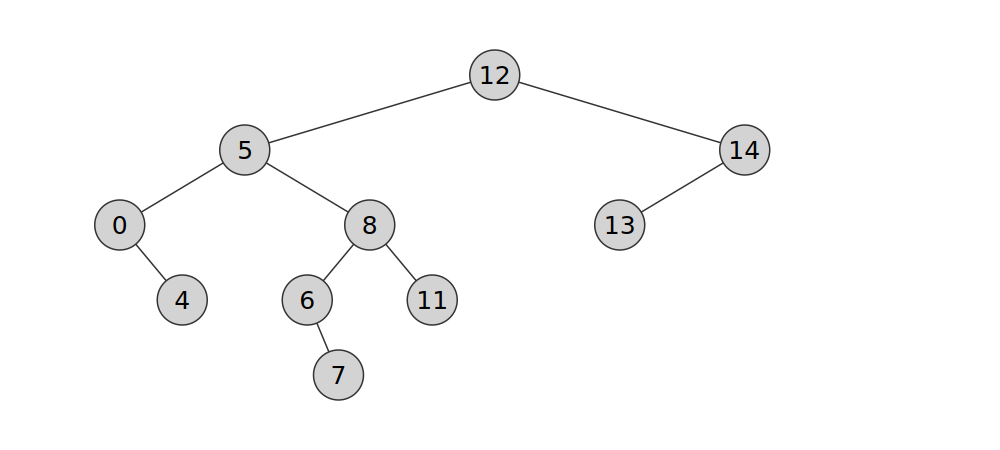

In [29]:
# Insertion de l'élément 7
abr2 = insertion(abr, 7)
abr2

### Recherche d'une clé

Puisque ce type d'arbre est trié, nous pouvons utiliser une méthode de [recherche dichotomique](../../../../1g/nsi/8-algorithmique/4-recherche-dichotomique) telle que nous l'avions vu en première.

On peut ainsi éliminer la moitié de l'arbre à chaque itération et la complexité est $log(n)$ si l'arbre est équilibré.

Voici le pseudo code de cet algorithme.

```
fonction Recherche(A,e)

        Si A = .

            retourner Faux

        Sinon A = (x,FilsGauche,FilsDroit)

            Si x = e

                retourner Vrai

            Sinon si e < x

                retourner Recherche(FilsGauche,e)

            Sinon

                retourner Recherche(FilsDroit,e)
```


::: app

Implémenter cet algorithme en Python en utilisant le module binarytree.

:::

::: ref

- [Article Wikipedia sur les arbres](https://fr.wikipedia.org/wiki/Arbre_enracin%C3%A9)
- [Article Wikipedia sur les arbres binaires de recherche](https://fr.wikipedia.org/wiki/Arbre_enracin%C3%A9)

:::